Adem Baran Orhan


What is the problem ? 

Shortly we have 3000 chest Xray images of people and It is expected to use KNN and weighted KNN to detect diseases.

The training set contains 1000 images for each class, and the test set contains 100
images for each class.

Classes are normal, covid, pneumonia. The X-Ray images in the dataset have various height and width values. So other problem is resizing them.

I used OpenCV function resize for the resizing.
(https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/)


I tried to comment on the outputs why we have misestimated result at KNN sections for 4 experiments indise the code and overall comments at the end of the Part 2.

# Importing Libraries

In [ ]:
from glob import glob
from skimage.feature import hog
#from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore') #for not printing the warning, clean look 
from scipy.stats import mode #to get the mode of labels for predicting in knnfunctions
from skimage import feature
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
#from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import os
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from PIL import Image
from skimage import color
from skimage import io
import cv2
import seaborn as sns #for confusion matrixs


# Paths

Since we have 8 total folder, I thought it would be easier to specify paths.
And we are not restricted by TA to use not our local path.

In [ ]:
path_train = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train"
path_test = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test"

In [ ]:
path_normal_train = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\normal"
path_covid_train = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\covid"
path_pneumonia_train = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\pneumonia"

In [ ]:
path_normal_test = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\normal"
path_covid_test = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\covid"
path_pneumonia_test = "C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\pneumonia"

# KNN and WKNN Functions

In [ ]:
#In this assignment I used only the euclidean for 2 reason.
# 1st is since we have 4 different experiment and 3 different k values I do not want too much parameters to show.
# 2nd reason is it is most used distance for the work we have. 
def eucledian_distance(point1,point2):
    return np.sqrt(np.sum((point1-point2)**2))

In [ ]:
#For weighted KNN I define a function for distance weight. Our distances are divided by 1 and then summed.
def weighted(k, distances):
    result = np.zeros(k, dtype=np.float32) #Float for further 1.0 division.
    sum = 0.0
    for i in range(k):
        result[i] =result[i] +( 1.0 / distances[i])
        sum = sum + result[i]
    result = result  / sum
    return result

In [ ]:
def knn_model(X_train , X_test,y_train, k):
    y_pred = []
    len_train=len(X_train) #we know it is 3000 but still taking the lenght
    X_train = np.array(X_train)
    for x_test_point in X_test: 
        distance = [] 
        for x_train_point in range(len_train): 
            distance.append(eucledian_distance(np.array(X_train[x_train_point,:]) , x_test_point)) 
        dist = np.argsort(distance)[:k] 
        labels = y_train[dist]
        #Using mode for most common labels 
        #Vote is another way to do in the KNN
        moded= mode(labels) 
        class_of_point = moded.mode[0]
        y_pred.append(class_of_point)
    return y_pred

In [ ]:
def wknn_model(X_train , X_test,y_train, k):
    y_pred = []
    len_train=len(X_train)
    X_train = np.array(X_train)
    for x_test_point in X_test: 
        distance = [] 
        for x_train_point in range(len_train): 
            distance.append(eucledian_distance(np.array(X_train[x_train_point,:]) , x_test_point)) 
        we = weighted(k,distance)
        #Different part from knn is we are calling weighted function and then sorting it.
        dist = np.argsort(distance)[:k] 
        labels = y_train[dist]
        most_common= mode(labels) 
        class_of_point = most_common.mode[0]
        y_pred.append(class_of_point)
    return y_pred

# Example After Resize Size Selected 64x64

Just showing the images for what they are look like.
And after resize also showing the instance.
In my case I used gray2rgb for get the grayscale image, otherwise It was getting the not grayscale.

(1858, 2090, 3)


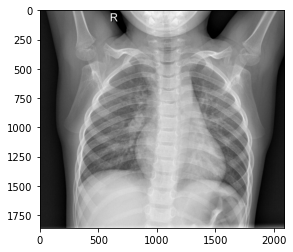

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_train+"\\normal-1.jpg")))

img.setflags(write=0)
print(img.shape)
plt.imshow(img)
plt.show()

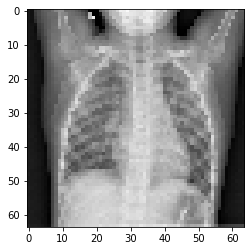

In [ ]:
resize = cv2.resize(img,(64,64))
plt.imshow(resize)
plt.show()

I used Canny instead of Gabor in the project.
Shape is an important and powerful feature for regression process on
images. 
Shape information extracted using histogram of edge detection.
Gabor was making my computer even slower with high image sizes. I used 64x64 and 32x32 and even with the 64x64 I was waiting for hours. If I had more computational power it will be easier for me to use it on experiments I have.

1 - Detection of edge with low error rate, which means that the detection should accurately catch as many edges shown in the image as possible

2 - The edge point detected from the operator should accurately localize on the center of the edge.

3 - A given edge in the image should only be marked once, and where possible, image noise should not create false edges.



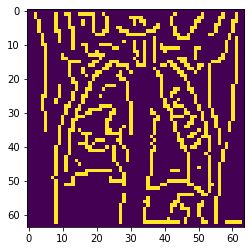

In [ ]:
img_gray = rgb2gray(resize)
edges1 = feature.canny(img_gray)
plt.imshow(edges1)


# IMAGE SIZE FEATURE (64X64)

In [ ]:
#normal train data
normal_data = []
"""The glob module finds all the pathnames matching a 
specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order
"""
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64)) #ON EVERY PART I am resizing the images with this line .
    fd = hog(resized)
    normal_data.append(fd)


#covid train data
covid_data = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64))
    fd = hog(resized)
    covid_data.append(fd)

#pneumonia train data
pneumonia_data = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64))
    fd = hog(resized)
    pneumonia_data.append(fd)

In [ ]:
#Combine data
X_train = normal_data + covid_data + pneumonia_data
print(len(X_train))

3000


In [ ]:
y_train = []

for i in range(len(X_train)):
    if i < 1000:
        y_train.append('normal')
       
    elif i < 2000:
        y_train.append('covid')
      
    elif i < 3000:
        y_train.append('pneumonia')

Encoding NORMAL-COVİD-PNEUMONİA for further use with integers.

NORMAL = 1

COVİD = 0

PNEUMONIA = 2


In [ ]:
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)


In [ ]:
# normal test data
test_normal = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'normal'}
    test_normal.append(test_dict)


#covid test data
test_covid = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'covid'}
    test_covid.append(test_dict)

#pneumonia test data
test_pneumonia = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(64,64))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'pneumonia'}
    test_pneumonia.append(test_dict)

    
test_data = test_normal+test_covid+test_pneumonia

print(len(test_data))


300


In [ ]:
y_test = []

for i in range(len(test_data)):
    if i < 100:
        y_test.append('normal')
    elif i < 200:
        y_test.append('covid')
    elif i < 300:
        y_test.append('pneumonia')
   


In [ ]:
y_test

['normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',

In [ ]:
y_test= label_encoder.fit_transform(y_test)

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [ ]:
X_test = []
for i in test_data:
    X_test.append(i['data'])


In [ ]:
X_test

[array([0.26363719, 0.01077721, 0.07592926, ..., 0.        , 0.        ,
        0.1286355 ]),
 array([0.2171256 , 0.        , 0.03359638, ..., 0.        , 0.04393859,
        0.26513456]),
 array([0.18897249, 0.        , 0.        , ..., 0.        , 0.        ,
        0.21966989]),
 array([0.18849616, 0.01658522, 0.0247207 , ..., 0.        , 0.10208795,
        0.29528426]),
 array([0.19979919, 0.01802363, 0.00603414, ..., 0.11210727, 0.04096284,
        0.27224208]),
 array([0.13331907, 0.        , 0.        , ..., 0.        , 0.        ,
        0.06682105]),
 array([0.14438803, 0.00312391, 0.02485129, ..., 0.04806957, 0.07636492,
        0.2596155 ]),
 array([0.26646915, 0.04896814, 0.08423985, ..., 0.01743057, 0.00620167,
        0.11358386]),
 array([0.24786167, 0.03001762, 0.01413079, ..., 0.        , 0.03445319,
        0.26932942]),
 array([0.26306965, 0.01412785, 0.01320484, ..., 0.        , 0.        ,
        0.00886969]),
 array([0.24038823, 0.08263351, 0.03944919, ..., 0

# KNN AND WKNN MODELS FOR FEATURE 64X64 WITH K=11,9,7 Euclidean Distance

In [ ]:
%%time

for k in [11,9,7]:
    y_pred = knn_model(X_train,X_test,y_train, k)
    print(f"Accuracy of KNN for k = {k}")
    print(round(accuracy_score(y_test,
                           y_pred)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    table1 = classification_report(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------")

Accuracy of KNN for k = 11
80.33
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       100
           1       0.75      0.71      0.73       100
           2       0.72      0.86      0.79       100

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.81       300
weighted avg       0.82      0.80      0.81       300

---------------------------------------------------------------------
Accuracy of KNN for k = 9
80.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       100
           1       0.74      0.73      0.74       100
           2       0.74      0.86      0.79       100

    accuracy                           0.81       300
   macr

In [ ]:
%%time
for k in [11,9,7]:
    y_pred_wknn = wknn_model(X_train,X_test,y_train, k)
    print(f"Accuracy of Weighted-KNN for k = {k}")
    print(round(accuracy_score(y_test,
                           y_pred_wknn)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    print(classification_report(y_test,y_pred_wknn))
    print("---------------------------------------------------------------------")

Accuracy of Weighted-KNN for k = 11
80.33
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       100
           1       0.75      0.71      0.73       100
           2       0.72      0.86      0.79       100

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.81       300
weighted avg       0.82      0.80      0.81       300

---------------------------------------------------------------------
Accuracy of Weighted-KNN for k = 9
80.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       100
           1       0.74      0.73      0.74       100
           2       0.74      0.86      0.79       100

    accuracy                           0.81

- Confusion Matrix

I wanted to print every predicted image and real value because I will analyze some of them 

Why It is predicted wrongly, misestimated.

In [ ]:

for i in range(300):
    print(f"-{i}-")
    if y_pred[i] == 1:
        print("Predicted class: normal")
        print("Real class",test_data[i]['label'])
        print("----")
    elif y_pred[i] == 0:
        print("Predicted class: covid")
        print("Real class",test_data[i]['label'])
        print("----")       
    elif y_pred[i] == 2:
        print("Predicted class: pneumonia")
        print("Real class",test_data[i]['label'])
        print("----")

       

-0-
Predicted class: normal
Real class normal
----
-1-
Predicted class: normal
Real class normal
----
-2-
Predicted class: pneumonia
Real class normal
----
-3-
Predicted class: normal
Real class normal
----
-4-
Predicted class: normal
Real class normal
----
-5-
Predicted class: normal
Real class normal
----
-6-
Predicted class: normal
Real class normal
----
-7-
Predicted class: normal
Real class normal
----
-8-
Predicted class: normal
Real class normal
----
-9-
Predicted class: normal
Real class normal
----
-10-
Predicted class: normal
Real class normal
----
-11-
Predicted class: normal
Real class normal
----
-12-
Predicted class: normal
Real class normal
----
-13-
Predicted class: normal
Real class normal
----
-14-
Predicted class: normal
Real class normal
----
-15-
Predicted class: normal
Real class normal
----
-16-
Predicted class: normal
Real class normal
----
-17-
Predicted class: pneumonia
Real class normal
----
-18-
Predicted class: normal
Real class normal
----
-19-
Predicted c

- ERROR ANALYSIS
Find a few misestimated images and comment on why you think they were hard
to estimate.


Lets look at index 2 because it predicted pneumonia but real image was normal.

In [ ]:
print(test_data[2])


{'data': array([0.18897249, 0.        , 0.        , ..., 0.        , 0.        ,
       0.21966989]), 'label': 'normal'}


Real image what like below

(1010, 1564, 3)


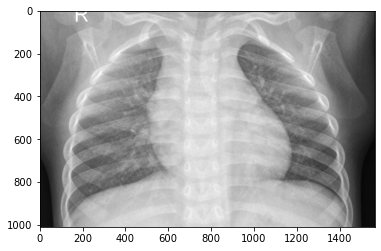

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-81.jpg")))
img.setflags(write=0)
print(img.shape)
plt.imshow(img)
plt.show()

After resize it is given model like below

(1010, 1564, 3)


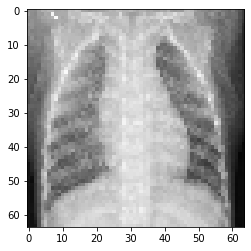

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-81.jpg")))
resized = cv2.resize(img,(64,64))

img.setflags(write=0)
print(img.shape)
plt.imshow(resized)
plt.show()



I am not professional about understanding disease but maybe model is predicted above image as pneumonia because of bigger lungs than normal. Resizing it to a low quality is also another reason for misclassification.

Text(0.5, 1.05, 'Confusion_matrix for KNN')

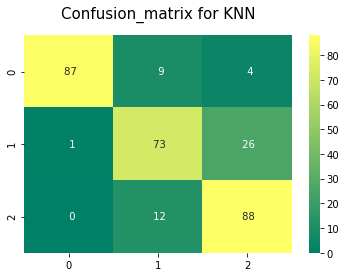

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for KNN', y=1.05, size=15)

Text(0.5, 1.05, 'Confusion_matrix for Weighted KNN')

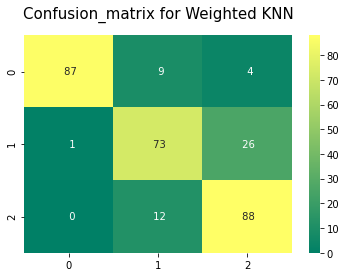

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred_wknn),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Weighted KNN', y=1.05, size=15)

# IMAGE SIZE FEATURE (32X32)

In [ ]:

#normal train data
normal_data = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    normal_data.append(fd)


#covid train data
covid_data = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    covid_data.append(fd)

#pneumonia train data
pneumonia_data = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    pneumonia_data.append(fd)
    
    
X_train = normal_data + covid_data + pneumonia_data


In [ ]:
y_train = []

for i in range(len(X_train)):
    if i < 1000:
        y_train.append('normal')
       
    elif i < 2000:
        y_train.append('covid')
      
    elif i < 3000:
        y_train.append('pneumonia')
        
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)

In [ ]:
# normal test data
test_normal = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'normal'}
    test_normal.append(test_dict)


#covid test data
test_covid = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'covid'}
    test_covid.append(test_dict)

#pneumonia test data
test_pneumonia = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    resized = cv2.resize(img,(32,32))
    fd = hog(resized)
    test_dict = {'data':fd,'label':'pneumonia'}
    test_pneumonia.append(test_dict)

    
test_data = test_normal+test_covid+test_pneumonia



In [ ]:
y_test = []

for i in range(len(test_data)):
    if i < 100:
        y_test.append('normal')
    elif i < 200:
        y_test.append('covid')
    elif i < 300:
        y_test.append('pneumonia')
        
        
y_test= label_encoder.fit_transform(y_test)

In [ ]:
X_test = []
for i in test_data:
    X_test.append(i['data'])


# KNN AND WKNN MODELS FOR FEATURE IMAGE SIZE 32x32 WITH K=11,9,7 Euclidean Distance

In [ ]:
%%time

for k in [11,9,7]:
    y_pred = knn_model(X_train,X_test,y_train, k)
    print(f"Accuracy of KNN for k = {k}")
    print(round(accuracy_score(y_test,
                           y_pred)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    table2 = classification_report(y_test,y_pred)
    print(classification_report(y_test,y_pred))
    print("---------------------------------------------------------------------")

Accuracy of KNN for k = 11
84.67
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.75      0.86      0.80       100
           2       0.85      0.80      0.82       100

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

---------------------------------------------------------------------
Accuracy of KNN for k = 9
82.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       100
           1       0.74      0.81      0.78       100
           2       0.79      0.80      0.80       100

    accuracy                           0.83       300
   macr

In [ ]:
%%time

for k in [11,9,7]:
    y_pred_wknn = wknn_model(X_train,X_test,y_train, k)
    print(f"Accuracy of Weighted for k = {k}")
    print(round(accuracy_score(y_test,
                           y_pred_wknn)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    print(classification_report(y_test,y_pred_wknn))
    print("---------------------------------------------------------------------")

Accuracy of Weighted for k = 11
84.67
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.75      0.86      0.80       100
           2       0.85      0.80      0.82       100

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

---------------------------------------------------------------------
Accuracy of Weighted for k = 9
82.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       100
           1       0.74      0.81      0.78       100
           2       0.79      0.80      0.80       100

    accuracy                           0.83       3

In [ ]:

for i in range(300):
    print(f"-{i}-")
    if y_pred[i] == 1:
        print("Predicted class: normal")
        print("Real class",test_data[i]['label'])
        print("----")
    elif y_pred[i] == 0:
        print("Predicted class: covid")
        print("Real class",test_data[i]['label'])
        print("----")       
    elif y_pred[i] == 2:
        print("Predicted class: pneumonia")
        print("Real class",test_data[i]['label'])
        print("----")


-0-
Predicted class: normal
Real class normal
----
-1-
Predicted class: normal
Real class normal
----
-2-
Predicted class: normal
Real class normal
----
-3-
Predicted class: pneumonia
Real class normal
----
-4-
Predicted class: normal
Real class normal
----
-5-
Predicted class: normal
Real class normal
----
-6-
Predicted class: normal
Real class normal
----
-7-
Predicted class: covid
Real class normal
----
-8-
Predicted class: normal
Real class normal
----
-9-
Predicted class: normal
Real class normal
----
-10-
Predicted class: normal
Real class normal
----
-11-
Predicted class: pneumonia
Real class normal
----
-12-
Predicted class: normal
Real class normal
----
-13-
Predicted class: normal
Real class normal
----
-14-
Predicted class: pneumonia
Real class normal
----
-15-
Predicted class: normal
Real class normal
----
-16-
Predicted class: normal
Real class normal
----
-17-
Predicted class: normal
Real class normal
----
-18-
Predicted class: normal
Real class normal
----
-19-
Predicted

- Error Analysis
Find a few misestimated images and comment on why you think they were hard
to estimate.


Lets look at the index 251 it predicted as normal but it was pneumonia.

(768, 1040, 3)


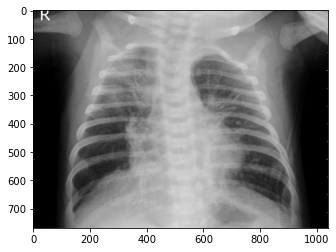

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_pneumonia_test+"\\pneumonia-52.jpg")))
print(img.shape)
plt.imshow(img)
plt.show()

(768, 1040, 3)


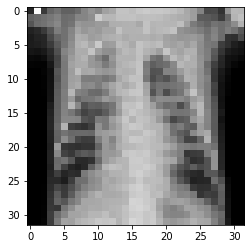

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_pneumonia_test+"\\pneumonia-52.jpg")))
resized = cv2.resize(img,(32,32))

img.setflags(write=0)
print(img.shape)
plt.imshow(resized)
plt.show()

For comparing the above image I want to show normal image.


(1044, 1266, 3)


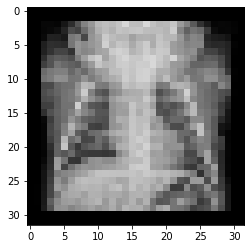

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-44.jpg")))
resized = cv2.resize(img,(32,32))

img.setflags(write=0)
print(img.shape)
plt.imshow(resized)
plt.show()

Several reason it predicted as normal, low image size is make it harder to predict because the some pixels were important and decides the disesase with its place and color level. Now we lost some valuable information of the pneumonia with lower size.
And if you look the above image(32x32) it is similar to normal xrays.

Text(0.5, 1.05, 'Confusion_matrix for KNN')

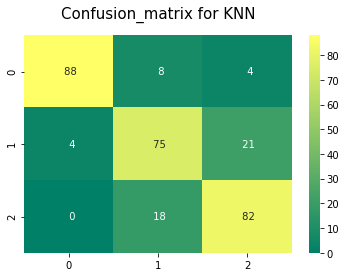

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for KNN', y=1.05, size=15)

Text(0.5, 1.05, 'Confusion_matrix for Weighted KNN')

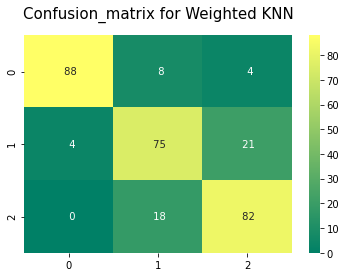

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred_wknn),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Weighted KNN', y=1.05, size=15)

# IMAGE SIZE 64X64 + CANNY EDGE DETECTION

In [ ]:

normal_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    normal_data_canny.append(fd)

    
#covid train data
covid_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    covid_data_canny.append(fd)

#pneumonia train data
pneumonia_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    pneumonia_data_canny.append(fd)
    
X_train_canny = normal_data_canny + covid_data_canny + pneumonia_data_canny


In [ ]:
y_train_canny = []

for i in range(len(X_train)):
    if i < 1000:
        y_train_canny.append('normal')
       
    elif i < 2000:
        y_train_canny.append('covid')
      
    elif i < 3000:
        y_train_canny.append('pneumonia')
        
label_encoder = preprocessing.LabelEncoder()
y_train_canny= label_encoder.fit_transform(y_train_canny)

In [ ]:
# normal test data
test_normal_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    test_dict = {'data':fd,'label':'normal'}
    test_normal_canny.append(test_dict)


#covid test data
test_covid_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    test_dict = {'data':fd,'label':'covid'}
    test_covid_canny.append(test_dict)

#pneumonia test data
test_pneumonia_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(64,64))
    fd = hog(img)
    test_dict = {'data':fd,'label':'pneumonia'}
    test_pneumonia_canny.append(test_dict)

    
test_data = test_normal_canny+test_covid_canny+test_pneumonia_canny

In [ ]:
y_test_canny = []

for i in range(len(test_data)):
    if i < 100:
        y_test_canny.append('normal')
    elif i < 200:
        y_test_canny.append('covid')
    elif i < 300:
        y_test_canny.append('pneumonia')
        
        
y_test_canny= label_encoder.fit_transform(y_test_canny)

In [ ]:
X_test_canny = []
for i in test_data:
    X_test_canny.append(i['data'])


In [ ]:
%%time

for k in [11,9,7]:
    y_pred = knn_model(X_train_canny,X_test_canny,y_train_canny, k)
    print(f"Accuracy of KNN for k = {k}")
    print(round(accuracy_score(y_test_canny,
                           y_pred)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    table3 = classification_report(y_test_canny,y_pred)
    print(classification_report(y_test_canny,y_pred))
    print("---------------------------------------------------------------------")

Accuracy of KNN for k = 11
62.0
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       100
           1       0.54      0.55      0.55       100
           2       0.57      0.82      0.67       100

    accuracy                           0.62       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.67      0.62      0.62       300

---------------------------------------------------------------------
Accuracy of KNN for k = 9
61.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.91      0.48      0.63       100
           1       0.54      0.54      0.54       100
           2       0.56      0.83      0.67       100

    accuracy                           0.62       300
   macro

In [ ]:
%%time

for k in [11,9,7]:
    y_pred_wknn = wknn_model(X_train_canny,X_test_canny,y_train_canny, k)
    print(f"Accuracy of WeKNN for k = {k}")
    print(round(accuracy_score(y_test_canny,
                           y_pred_wknn)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    print(classification_report(y_test_canny,y_pred_wknn))
    print("---------------------------------------------------------------------")

Accuracy of WeKNN for k = 11
62.0
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.89      0.49      0.63       100
           1       0.54      0.55      0.55       100
           2       0.57      0.82      0.67       100

    accuracy                           0.62       300
   macro avg       0.67      0.62      0.62       300
weighted avg       0.67      0.62      0.62       300

---------------------------------------------------------------------
Accuracy of WeKNN for k = 9
61.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.91      0.48      0.63       100
           1       0.54      0.54      0.54       100
           2       0.56      0.83      0.67       100

    accuracy                           0.62       300
   m

Text(0.5, 1.05, 'Confusion_matrix for KNN')

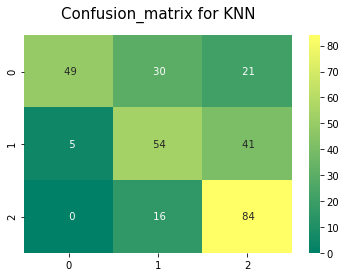

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test_canny,y_pred))
sns.heatmap(confusion_matrix(y_test_canny,y_pred),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for KNN', y=1.05, size=15)

Text(0.5, 1.05, 'Confusion_matrix for Weighted KNN')

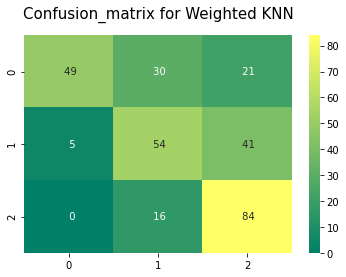

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test_canny,y_pred))
sns.heatmap(confusion_matrix(y_test_canny,y_pred_wknn),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Weighted KNN', y=1.05, size=15)

# IMAGE SIZE 32X32 + CANNY EDGE DETECTION

In [ ]:
normal_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    normal_data_canny.append(fd)

    
#covid train data
covid_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    covid_data_canny.append(fd)

#pneumonia train data
pneumonia_data_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\train\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    pneumonia_data_canny.append(fd)
    
X_train_canny = normal_data_canny + covid_data_canny + pneumonia_data_canny

In [ ]:
y_train_canny = []

for i in range(len(X_train)):
    if i < 1000:
        y_train_canny.append('normal')
       
    elif i < 2000:
        y_train_canny.append('covid')
      
    elif i < 3000:
        y_train_canny.append('pneumonia')
        
label_encoder = preprocessing.LabelEncoder()
y_train_canny= label_encoder.fit_transform(y_train_canny)

In [ ]:
# normal test data
test_normal_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\normal\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    test_dict = {'data':fd,'label':'normal'}
    test_normal_canny.append(test_dict)


#covid test data
test_covid_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\covid\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    test_dict = {'data':fd,'label':'covid'}
    test_covid_canny.append(test_dict)

#pneumonia test data
test_pneumonia_canny = []
for entry in glob("C:\\Users\\a_b_o\\OneDrive\\Masaüstü\\ASSIGNMENT1\\chest_xray\\chest_xray\\test\\pneumonia\\*.jpg"):
    img = np.array(color.gray2rgb(io.imread(entry)))
    img = cv2.Canny(img,20,100)
    img = cv2.resize(img,(32,32))
    fd = hog(img)
    test_dict = {'data':fd,'label':'pneumonia'}
    test_pneumonia_canny.append(test_dict)

    
test_data = test_normal_canny+test_covid_canny+test_pneumonia_canny

In [ ]:
y_test_canny = []

for i in range(len(test_data)):
    if i < 100:
        y_test_canny.append('normal')
    elif i < 200:
        y_test_canny.append('covid')
    elif i < 300:
        y_test_canny.append('pneumonia')
        
        
y_test_canny= label_encoder.fit_transform(y_test_canny)

In [ ]:
X_test_canny = []
for i in test_data:
    X_test_canny.append(i['data'])

In [ ]:
%%time

for k in [11,9,7]:
    y_pred = knn_model(X_train_canny,X_test_canny,y_train_canny, k)
    print(f"Accuracy of KNN for k = {k}")
    print(round(accuracy_score(y_test_canny,
                           y_pred)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    table4 = classification_report(y_test_canny,y_pred) 
    print(classification_report(y_test_canny,y_pred))
    print("---------------------------------------------------------------------")

Accuracy of KNN for k = 11
50.0
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       100
           1       0.44      0.46      0.45       100
           2       0.45      0.57      0.50       100

    accuracy                           0.50       300
   macro avg       0.53      0.50      0.50       300
weighted avg       0.53      0.50      0.50       300

---------------------------------------------------------------------
Accuracy of KNN for k = 9
49.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.70      0.46      0.55       100
           1       0.44      0.46      0.45       100
           2       0.44      0.57      0.50       100

    accuracy                           0.50       300
   macro

In [ ]:

for i in range(300):
    print(f"-{i}-")
    if y_pred[i] == 1:
        print("Predicted class: normal")
        print("Real class",test_data[i]['label'])
        print("----")
    elif y_pred[i] == 0:
        print("Predicted class: covid")
        print("Real class",test_data[i]['label'])
        print("----")       
    elif y_pred[i] == 2:
        print("Predicted class: pneumonia")
        print("Real class",test_data[i]['label'])
        print("----")


-0-
Predicted class: normal
Real class normal
----
-1-
Predicted class: normal
Real class normal
----
-2-
Predicted class: pneumonia
Real class normal
----
-3-
Predicted class: normal
Real class normal
----
-4-
Predicted class: normal
Real class normal
----
-5-
Predicted class: normal
Real class normal
----
-6-
Predicted class: pneumonia
Real class normal
----
-7-
Predicted class: pneumonia
Real class normal
----
-8-
Predicted class: normal
Real class normal
----
-9-
Predicted class: normal
Real class normal
----
-10-
Predicted class: pneumonia
Real class normal
----
-11-
Predicted class: normal
Real class normal
----
-12-
Predicted class: normal
Real class normal
----
-13-
Predicted class: normal
Real class normal
----
-14-
Predicted class: normal
Real class normal
----
-15-
Predicted class: pneumonia
Real class normal
----
-16-
Predicted class: pneumonia
Real class normal
----
-17-
Predicted class: normal
Real class normal
----
-18-
Predicted class: pneumonia
Real class normal
----
-

- Error Analysis 

Lets look at why our concaneted model misestimated the class
İt is estimated as pneumonia but real class was normal.

(1224, 1762, 3)


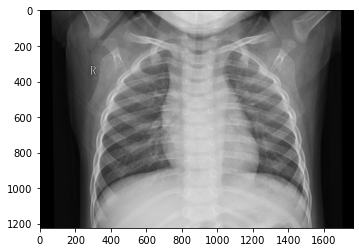

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
print(img.shape)
plt.imshow(img)
plt.show()

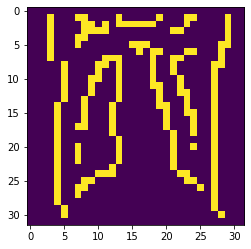

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
resized = cv2.resize(img,(32,32))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)


Now I wondered what pneumonia images looks like after canny and resize. Maybe they have not too many difference between them.
As ypu can see at the low sizes with canny some of them are similar considering the edges. 

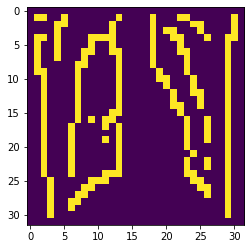

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_pneumonia_test+"\\pneumonia-25.jpg")))
resized = cv2.resize(img,(32,32))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)

Since model is mainly looks at the edges, maybe because of the lung shape and not normal size edges near to center is reason of the misestimate.

In [ ]:
%%time

for k in [11,9,7]:
    y_pred_wknn = wknn_model(X_train_canny,X_test_canny,y_train_canny, k)
    print(f"Accuracy of Weighted KNN for k = {k}")
    print(round(accuracy_score(y_test_canny,
                           y_pred_wknn)*100,2))
    print("---------------------------------------------------------------------")
    print(f"Classification Report for k = {k}")
    print(classification_report(y_test_canny,y_pred_wknn))
    print("---------------------------------------------------------------------")

Accuracy of Weighted KNN for k = 11
50.0
---------------------------------------------------------------------
Classification Report for k = 11
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       100
           1       0.44      0.46      0.45       100
           2       0.45      0.57      0.50       100

    accuracy                           0.50       300
   macro avg       0.53      0.50      0.50       300
weighted avg       0.53      0.50      0.50       300

---------------------------------------------------------------------
Accuracy of Weighted KNN for k = 9
49.67
---------------------------------------------------------------------
Classification Report for k = 9
              precision    recall  f1-score   support

           0       0.70      0.46      0.55       100
           1       0.44      0.46      0.45       100
           2       0.44      0.57      0.50       100

    accuracy                           0.50 

In [ ]:

for i in range(300):
    print(f"-{i}-")
    if y_pred[i] == 1:
        print("Predicted class: normal")
        print("Real class",test_data[i]['label'])
        print("----")
    elif y_pred[i] == 0:
        print("Predicted class: covid")
        print("Real class",test_data[i]['label'])
        print("----")       
    elif y_pred[i] == 2:
        print("Predicted class: pneumonia")
        print("Real class",test_data[i]['label'])
        print("----")


-0-
Predicted class: normal
Real class normal
----
-1-
Predicted class: normal
Real class normal
----
-2-
Predicted class: pneumonia
Real class normal
----
-3-
Predicted class: normal
Real class normal
----
-4-
Predicted class: normal
Real class normal
----
-5-
Predicted class: normal
Real class normal
----
-6-
Predicted class: pneumonia
Real class normal
----
-7-
Predicted class: pneumonia
Real class normal
----
-8-
Predicted class: normal
Real class normal
----
-9-
Predicted class: normal
Real class normal
----
-10-
Predicted class: pneumonia
Real class normal
----
-11-
Predicted class: normal
Real class normal
----
-12-
Predicted class: normal
Real class normal
----
-13-
Predicted class: normal
Real class normal
----
-14-
Predicted class: normal
Real class normal
----
-15-
Predicted class: pneumonia
Real class normal
----
-16-
Predicted class: pneumonia
Real class normal
----
-17-
Predicted class: normal
Real class normal
----
-18-
Predicted class: pneumonia
Real class normal
----
-

- Error Analysis 

Lets look at why our concaneted model misestimated the class
İt is estimated as pneumonia but real class was normal.

(1224, 1762, 3)


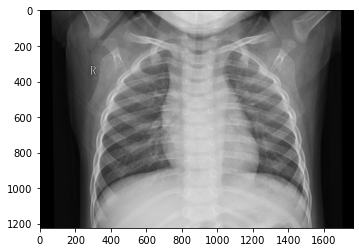

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
print(img.shape)
plt.imshow(img)
plt.show()

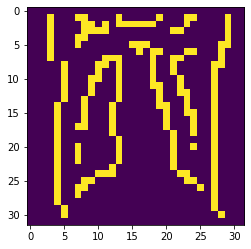

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
resized = cv2.resize(img,(32,32))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)


Now I wondered what pneumonia images looks like after canny and resize. Maybe they have not too many difference between them.
As ypu can see at the low sizes with canny some of them are similar considering the edges. 

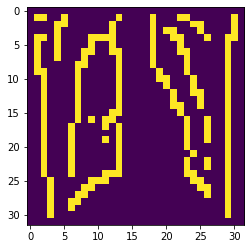

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_pneumonia_test+"\\pneumonia-25.jpg")))
resized = cv2.resize(img,(32,32))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)

Since model is mainly looks at the edges, maybe because of the lung shape and not normal size edges near to center is reason of the misestimate.

Text(0.5, 1.05, 'Confusion_matrix for KNN')

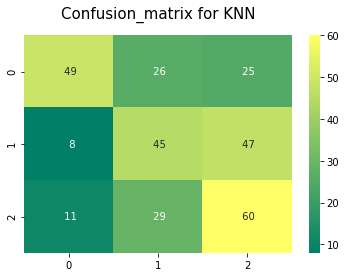

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test_canny,y_pred))
sns.heatmap(confusion_matrix(y_test_canny,y_pred),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for KNN', y=1.05, size=15)

Text(0.5, 1.05, 'Confusion_matrix for Weighted KNN')

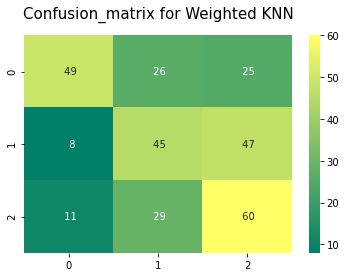

In [ ]:
conf_matrix_euclidean = []
conf_matrix_euclidean.append(metrics.confusion_matrix(y_test_canny,y_pred))
sns.heatmap(confusion_matrix(y_test_canny,y_pred_wknn),
            annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for Weighted KNN', y=1.05, size=15)

# TABLES



| Experiments 	| Image Size 	| Canny 	| Accuracy(k=11,9,7) 	|
|-------------	|------------	|-------	|--------------------	|
|      1      	| 64x64      	| -     	| 80,33-80,67-82,67  	|
|      2      	| 32x32      	| -     	| 84,67-82,67-81,67  	|
|      3      	| 64x64      	| +     	| 62,00-61,67-62,33  	|
|      4      	| 32x32      	| +     	| 50,00-49,67-51,33  	|




Instead of printing all precision, recall values with complicated, I am giving more clean tables below.


In [ ]:
print("CLASSIFICATION REPORT FOR 64x64\n")
print(table1)
print("-------------------------------")
print("CLASSIFICATION REPORT FOR 32x32\n")
print(table2)
print("-------------------------------")
print("CLASSIFICATION REPORT FOR 64x64 + CANNY\n")
print(table3)
print("-------------------------------")
print("CLASSIFICATION REPORT FOR 32x32 + CANNY\n")
print(table4)
print("-------------------------------")

CLASSIFICATION REPORT FOR 64x64

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       100
           1       0.78      0.73      0.75       100
           2       0.75      0.88      0.81       100

    accuracy                           0.83       300
   macro avg       0.84      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300

-------------------------------
CLASSIFICATION REPORT FOR 32x32

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       100
           1       0.74      0.75      0.75       100
           2       0.77      0.82      0.79       100

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

-------------------------------
CLASSIFICATION REPORT FOR 64x64 + CANNY

              precision    recall  f1-score   support

           0

If you look at the accuracy table above, you can see we get lowest accuracy for Canny and 32x32 images. I showed the 2 images and we can also understand from images there is not much differences for some of the images. The main reason behind we have lower accuracy is we are considering the edges and with lower sizes we obtaining very low valuable pixels for classifications.
My observations is also proved by the higher size 64x64 Canny accuracy is increased.
Below I showed what I mean: 

Same images with different sizes. As you can see it will be easier both for model and doctor to predict disease from higher sizes. 

For both weighted and normal knn our accuracy on Canny used experiments we have higher accuracy on k=7. I used odd values for k for tie breaker. And 3 different values for k to prove if k increase or decrese not means better results always. k decreased and get better results for Canny but we can not say same thing for none Canny experiments. For 2nd experiment k decreased and also our accuracy is decreased. We get the highest accuracy on the 32x32 interestingly. Since we have less test data (300 images) for testing the model it will get worse with higher data. We can not trust the current version of the model with even >80 accuracy. 

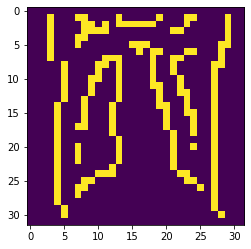

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
resized = cv2.resize(img,(32,32))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)


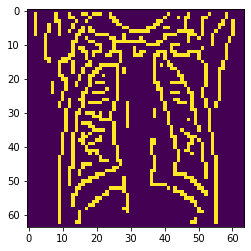

In [ ]:
img = np.array(color.gray2rgb(io.imread(path_normal_test+"\\normal-26.jpg")))
resized = cv2.resize(img,(64,64))
img_gray = rgb2gray(resized)
edges2 = feature.canny(img_gray)
plt.imshow(edges2)


Below figure showing the time value of knn and weighted knn cell execution time.

1- 64x64

2- 32x32

3- 64x64 + Canny

4- 32x32 + Canny

We have nearly double time spendt on the 64x64 sized images. But with smallest amount of time for 2nd experiment we had the best accuracy.

| Experiment  	| Computation Time 	|
|-------------	|------------------	|
| 1-KNN       	| 50 s             	|
| 1-WKNN      	| 50,2 s           	|
| 2-KNN       	| 23,7 s           	|
| 2-WKNN      	| 23,7 s           	|
| 3-KNN       	| 51,4 s           	|
| 3-WKNN      	| 51,3 s           	|
| 4-KNN       	| 23,8 s           	|
| 4-WKNN      	| 23,6 s           	|